In [1]:
#install.packages("reactable")
#library(reactable)
library(ggplot2)
library(tidyverse)
library(broom)
library(knitr)
library(dplyr)
install.packages("ggrepel")
library(ggrepel)
womenwinning_df <- read.csv("officeholders_race_ethnicity.csv")
total_seats_df <- read.csv("seats_in_state_leg.csv")

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘broom’ was built under R version 4.0.2”
Warning message:
“package ‘knitr’ was built under R version 4.0.1”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### Intial exploring

In [5]:
head(womenwinning_df)

,id,year,first_name,middle_name,last_name,party,level,position,state,district,race_ethnicity
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,566417k,2017,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
2,566417k,2018,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
3,566417k,2019,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
4,566417k,2020,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White
5,14772c,2010,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White
6,14772c,2011,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White


In [6]:
table_of_race <- table(womenwinning_df["race_ethnicity"])
head(table_of_race)


                                     Asian/Pacific Islander 
                                                        634 
                                     Black/African American 
                                                       3695 
                                            Hispanic/Latina 
                                                       1397 
                               Middle Eastern/North African 
                                                         22 
                                                Multiracial 
                                                         15 
Multiracial, Black/African American, Asian/Pacific Islander 
                                                         18 

In [7]:
table_of_levels <- table(womenwinning_df["level"])
head(table_of_levels)


   Federal/Congress   State Legislative Statewide Executive    Territorial/D.C. 
               1381               24540                1017                 112 

In [8]:
table_of_positions <- table(womenwinning_df["position"])
head(table_of_positions)


             Agriculture         Attorney General                  Auditor 
                       9                       98                      106 
 Chief Financial Officer              Comptroller Corporation Commissioner 
                       3                       40                       34 

### Making a dataframe with only the State Legislators and Removing Guam and Puerto Rico for consistency

In [9]:
state_leg <- womenwinning_df%>%
    filter(
    level == "State Legislative" &
    state != "Guam - GU" & state != "Puerto Rico - PR"
    )

state_leg_df <- inner_join (
    state_leg, total_seats_df,
    by = c("state"),
    copy = FALSE
)

head(state_leg_df)

,id,year,first_name,middle_name,last_name,party,level,position,state,district,race_ethnicity,Tot_seats_in_state_leg
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,566417k,2017,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White,150
2,566417k,2018,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White,150
3,566417k,2019,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White,150
4,566417k,2020,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White,150
5,14772c,2010,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White,140
6,14772c,2011,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White,140


In [10]:
dim(state_leg_df) 

[1] 24520    12

In [11]:
tbl_of_positions2 <- table(state_leg_df["position"])
print(tbl_of_positions2) #checking for cleanness


State Representative        State Senator 
               18611                 5909 


### Looking at Women by State, Year, Race, Region

In [12]:
tbl_by_state <- table(state_leg_df["state"]) #gotta convert this to a string, 
                                             #and then we could do percents too
print(tbl_by_state) #raw number based on location




       Alabama - AL         Alaska - AK        Arizona - AZ       Arkansas - AR 
                262                 218                 428                 369 
    California - CA       Colorado - CO    Connecticut - CT       Delaware - DE 
                425                 542                 729                 202 
       Florida - FL        Georgia - GA         Hawaii - HI          Idaho - ID 
                559                 750                 316                 392 
      Illinois - IL        Indiana - IN           Iowa - IA         Kansas - KS 
                763                 423                 466                 596 
      Kentucky - KY      Louisiana - LA          Maine - ME       Maryland - MD 
                325                 280                 770                 805 
 Massachusetts - MA       Michigan - MI      Minnesota - MN    Mississippi - MS 
                684                 467                 872                 354 
      Missouri - MO        

In [13]:
state_leg_yr <- state_leg_df%>%
    group_by(year) %>%
    summarize(
        count = n())
print(state_leg_yr)

`summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 13 x 2
    year count
   <int> <int>
 1  2008  1780
 2  2009  1837
 3  2010  1842
 4  2011  1784
 5  2012  1776
 6  2013  1826
 7  2014  1827
 8  2015  1844
 9  2016  1826
10  2017  1892
11  2018  1913
12  2019  2169
13  2020  2204


In [14]:
state_leg_race <- state_leg_df%>%
    group_by(race_ethnicity) %>%
    summarize(count = n())
print(kable(state_leg_race))

`summarise()` ungrouping output (override with `.groups` argument)





|race_ethnicity                                                              | count|
|:---------------------------------------------------------------------------|-----:|
|Asian/Pacific Islander                                                      |   486|
|Black/African American                                                      |  3412|
|Hispanic/Latina                                                             |  1172|
|Middle Eastern/North African                                                |    18|
|Multiracial                                                                 |    13|
|Multiracial, Black/African American, Asian/Pacific Islander                 |     2|
|Multiracial, Black/African American, Hispanic/Latina                        |    13|
|Multiracial, Black/African American, Native American                        |    13|
|Multiracial, Hispanic/Latina, Asian/Pacific Islander                        |    15|
|Multiracial, Hispanic/Latina, Native American      

### Looking at Women by State, Year, Race, Region

`summarise()` regrouping output by 'state' (override with `.groups` argument)

`summarise()` regrouping output by 'state' (override with `.groups` argument)

`summarise()` regrouping output by 'race_ethnicity' (override with `.groups` argument)

`summarise()` regrouping output by 'race_ethnicity' (override with `.groups` argument)

Saving 6.67 x 6.67 in image



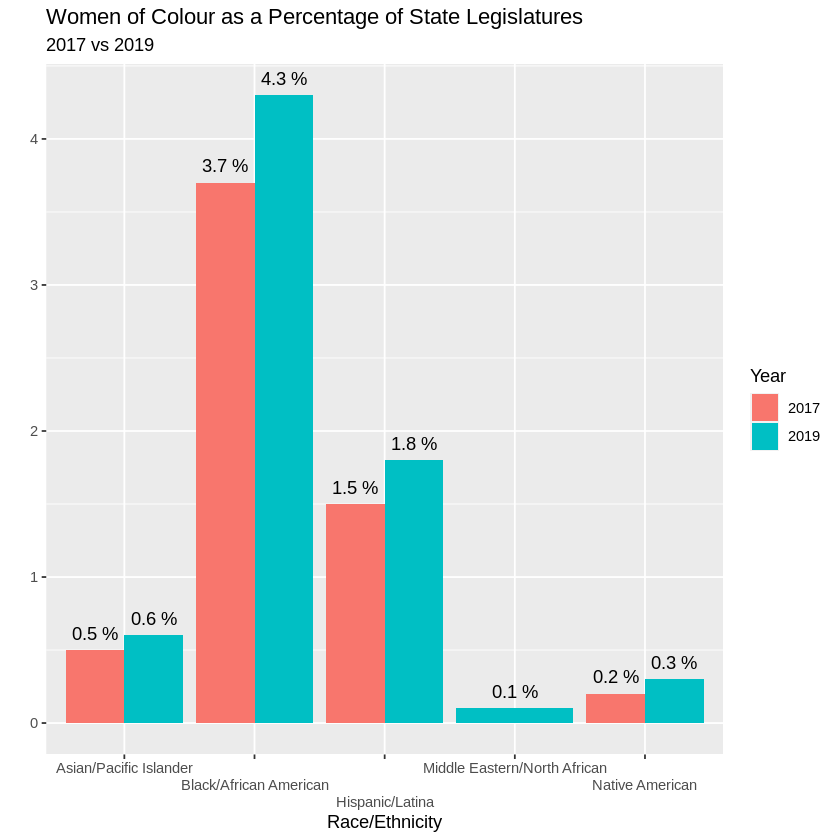

Saving 6.67 x 6.67 in image

`summarise()` regrouping output by 'state', 'race_ethnicity' (override with `.groups` argument)

`summarise()` regrouping output by 'state', 'race_ethnicity' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



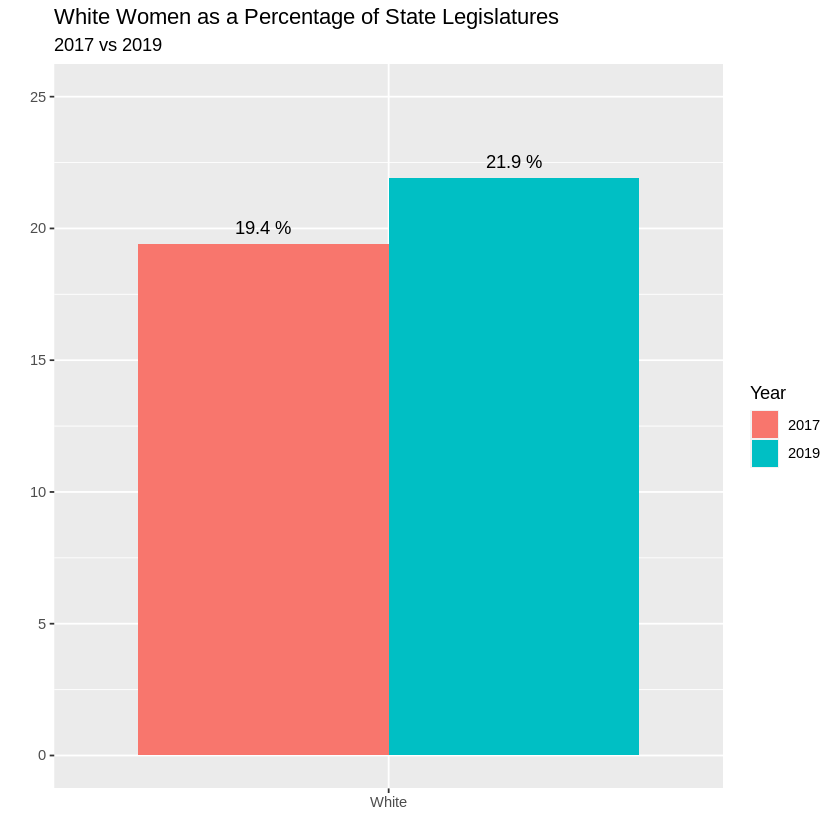

Saving 6.67 x 6.67 in image



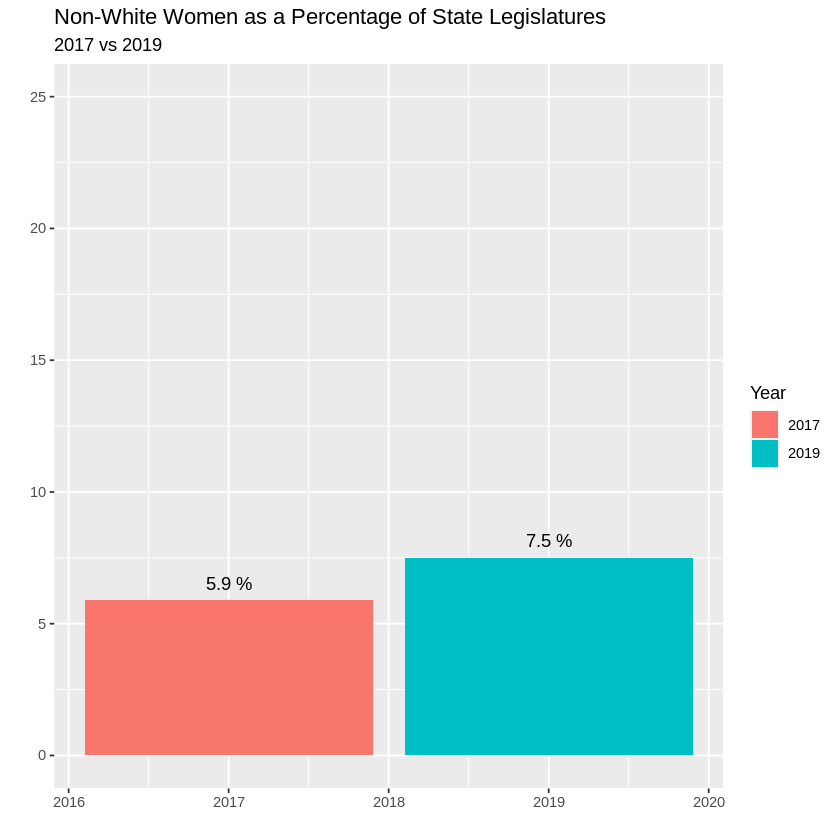

In [28]:
### Looking at State proportions in 2017 and 2019 (all women)
state_leg_state_2017 <- state_leg_df%>% 
    filter(year ==2017)%>%
    group_by(state) %>%
    summarize(
        count_2017 = n(),
    prop_in_state_2017 = round((count_2017/Tot_seats_in_state_leg)*100,1)
    ) %>% distinct()


state_leg_state_2019 <- state_leg_df%>% 
    filter(year ==2019)%>%
    group_by(state) %>%
    summarize(
        count_2019 = n(),
    prop_in_state_2019 = round((count_2019/Tot_seats_in_state_leg)*100,1)
    )%>% distinct()

state_leg_state_compare <- inner_join (
    state_leg_state_2017,state_leg_state_2019,
    by = c("state"),
    copy = FALSE
)

write.csv(state_leg_state_compare, file = "Proportion of Women in State Legislature by State in 2017 and 2019.csv")


### Looking at Race proportions within states in 2017 and 2019 
state_leg_race_break_2017 <- state_leg_df%>% 
    filter(year ==2017)%>%
    group_by(race_ethnicity) %>%
    summarize(
        year = year,
        count = n(),
    prop_in_reg = round((count/7383)*100,1)
    ) %>% distinct()

write.csv(state_leg_race_break_2017, file = "Racial breakdown as proportions of total seats in legislature in 2017.csv")

state_leg_race_break_2019 <- state_leg_df%>% 
    filter(year ==2019)%>%
    group_by(race_ethnicity) %>%
    summarize(
        year = year,
        count = n(),
    prop_in_reg = round((count/7383)*100,1)
    ) %>% distinct()

write.csv(state_leg_race_break_2019, file = "Racial breakdown as proportions of total seats in legislature in 2019.csv")

race_break_compare <- rbind(state_leg_race_break_2017,state_leg_race_break_2019)


race_break_compare_woc <- race_break_compare %>% filter(
        race_ethnicity == "Asian/Pacific Islander" | race_ethnicity == "Black/African American" | 
        race_ethnicity == "Hispanic/Latina" | race_ethnicity == "Middle Eastern/North African"| race_ethnicity == "Native American") %>%
        distinct()

race_break_compare_white <- race_break_compare %>% filter(
    race_ethnicity == "White") %>%
        distinct()


ggplot(race_break_compare_woc, (aes(x = race_ethnicity, y = prop_in_reg, fill = factor(year), label = paste(prop_in_reg, "%")))) + 
   geom_bar(stat = "identity", 
        position = position_dodge(width = 0.9)) +
        scale_x_discrete(guide = guide_axis(n.dodge=3))+
        labs(title = "Women of Colour as a Percentage of State Legislatures",
            subtitle = "2017 vs 2019",
            x = "Race/Ethnicity",
            y = " ",
            fill = "Year") +
    geom_text_repel(position = position_dodge(width = 0.9), vjust = -0.8)
    ggsave("Women of Colour in State Legislature in 2017 vs 2019.png")

ggplot(race_break_compare_white, (aes(x = race_ethnicity, y = prop_in_reg, fill = factor(year), label = paste(prop_in_reg, "%")))) + 
    geom_bar(stat = "identity", 
        position = position_dodge(width = 0.9)) +
        labs(title = "White Women as a Percentage of State Legislatures",
            subtitle = "2017 vs 2019",
            x = " ",
            y = " ",
            fill = "Year") +
    geom_text(position = position_dodge(width = 0.9), vjust = -0.8) + 
    ylim(0,25)
    ggsave("White Women in State Legislature in 2017 vs 2019.png")

state_leg_woc <- state_leg_df%>% 
    filter(
           race_ethnicity!= "White" & race_ethnicity != "White, White/Caucasian" & race_ethnicity != "Unavailable"
    )

write.csv(state_leg_woc, file = "state_leg_woc.csv")

state_leg_woc_count_2017 <- state_leg_woc%>% 
    filter(year  == 2017) %>%
    select(state, race_ethnicity, Tot_seats_in_state_leg)%>%
    group_by(state, race_ethnicity)%>%
    summarise(
        count = n(),
        prop_state_leg = count/Tot_seats_in_state_leg
        )%>%
    arrange(state, race_ethnicity)%>%
    distinct()

write.csv(state_leg_woc_count_2017, file = "state_leg_woc_count_2017.csv")

state_leg_woc_count_2019 <- state_leg_woc%>% 
    filter(year  == 2019) %>%
    select(state, race_ethnicity, Tot_seats_in_state_leg)%>%
    group_by(state, race_ethnicity)%>%
    summarise(
        count = n(),
        prop_state_leg = count/Tot_seats_in_state_leg
        )%>%
    arrange(state, race_ethnicity)%>%
    distinct()

write.csv(state_leg_woc_count_2019, file = "state_leg_woc_count_2019.csv")

race_break_compare %>%
    filter(race_ethnicity != "White") %>%
    group_by(year) %>%
    summarize(sum = sum(prop_in_reg)) %>%
    ggplot((aes(x = year, y = sum, fill = factor(year), label = paste(sum, "%")))) + 
        geom_bar(stat = "identity", 
            position = position_dodge(width = 0.9)) +
            labs(title = "Non-White Women as a Percentage of State Legislatures",
                subtitle = "2017 vs 2019",
                x = " ",
                y = " ",
                fill = "Year") +
        geom_text(position = position_dodge(width = 0.9), vjust = -0.8) +
        ylim(0,25)
ggsave("Nonwhite_perc_stateleg.jpg")


In [55]:
## double checking work to ensure same count

state_leg_women_countbyrace2017 <- state_leg_df%>% 
    filter(year  == 2017,
    ) %>% group_by(state, race_ethnicity) %>%
    summarize(count = n())

# print(kable(state_leg_women_countbyrace2017)) #check values

state_leg_women_countbyrace2019 <- state_leg_df%>% 
    filter(year  == 2019,
    ) %>% group_by(state, race_ethnicity) %>%
    summarize(count = n())

# print(kable(state_leg_women_countbyrace2019))

`summarise()` regrouping output by 'state' (override with `.groups` argument)

`summarise()` regrouping output by 'state' (override with `.groups` argument)



In [56]:
head(state_leg_df)

,id,year,first_name,middle_name,last_name,party,level,position,state,district,race_ethnicity,Tot_seats_in_state_leg
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,566417k,2017,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White,150
2,566417k,2018,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White,150
3,566417k,2019,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White,150
4,566417k,2020,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White,150
5,14772c,2010,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White,140
6,14772c,2011,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White,140


In [57]:
states_northeast <- c("Connecticut - CT", "Maine - ME", "Massachusetts - MA",
                      "New Hampshire - NH", "New Jersey - NJ", "New York - NY", "Pennsylvania - PA", 
                      "Rhode Island - RI", "Vermont - VT")
states_west <- c("Alaska - AK", "Arizona - AZ", "California - CA", "Colorado - CO", "Hawaii - HI", "Idaho - ID", "Nevada - NV", "Montana - MT",
                 "New Mexico - NM", "Oregon - OR", "Utah - UT", "Washington - WA", "Wyoming - WY")
states_midwest <- c("Indiana - IN", "Illinois - IL", "Iowa - IA", "Kansas - KS", "Michigan - MI", "Minnesota - MN", "Missouri - MO", 
                    "Nebraska - NE", "North Dakota - ND", "Ohio - OH", "South Dakota - SD", "Wisconsin - WI")
states_south <- c("Alabama - AL", "Arkansas - AR", "Delaware - DE",
                  "Florida - FL", "Georgia - GA", "Kentucky - KY", "Louisiana - LA", "Maryland - MD", "Mississippi - MS", 
                  "North Carolina - NC", "Oklahoma - OK", "South Carolina - SC", "Tennessee - TN", "Texas - TX", 
                  "Virginia - VA", "West Virginia - WV")


# Replace "dataset" with name of your dataset
state_leg_df <- state_leg_df %>% 
    mutate(region = case_when(state %in% states_northeast ~ "Northeast",
                            state %in% states_west ~ "West",
                            state %in% states_midwest ~ "Midwest",
                            state %in% states_south ~ "South",
                            TRUE ~ "Other")
          )

head(state_leg_df)



,id,year,first_name,middle_name,last_name,party,level,position,state,district,race_ethnicity,Tot_seats_in_state_leg,region
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,566417k,2017,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White,150,West
2,566417k,2018,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White,150,West
3,566417k,2019,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White,150,West
4,566417k,2020,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White,150,West
5,14772c,2010,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White,140,South
6,14772c,2011,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White,140,South


,id,year,first_name,middle_name,last_name,party,level,position,state,district,race_ethnicity,Tot_seats_in_state_leg,region,tot_seats_reg
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>
1,566417k,2017,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White,150,West,1307
2,566417k,2018,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White,150,West,1307
3,566417k,2019,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White,150,West,1307
4,566417k,2020,Kim,K.,Abbott,Democrat,State Legislative,State Representative,Montana - MT,83,White,150,West,1307
5,14772c,2010,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White,140,South,2453
6,14772c,2011,Robin,A.,Abbott,Democrat,State Legislative,State Representative,Virginia - VA,93,White,140,South,2453


`summarise()` regrouping output by 'region', 'race_ethnicity' (override with `.groups` argument)

`summarise()` regrouping output by 'region' (override with `.groups` argument)

`summarise()` regrouping output by 'region', 'race_ethnicity' (override with `.groups` argument)

`summarise()` regrouping output by 'region' (override with `.groups` argument)

Saving 6.67 x 6.67 in image

`summarise()` regrouping output by 'year' (override with `.groups` argument)





| year| count_non_white| prop_leg|
|----:|---------------:|--------:|
| 2017|             458|      6.2|
| 2019|             552|      7.5|


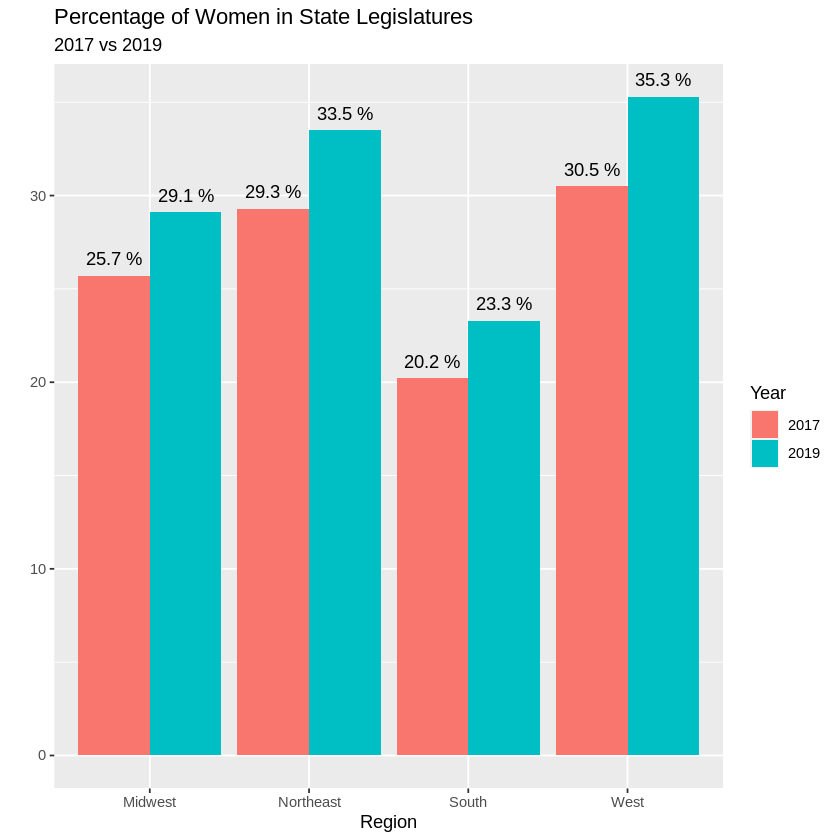

Saving 6.67 x 6.67 in image



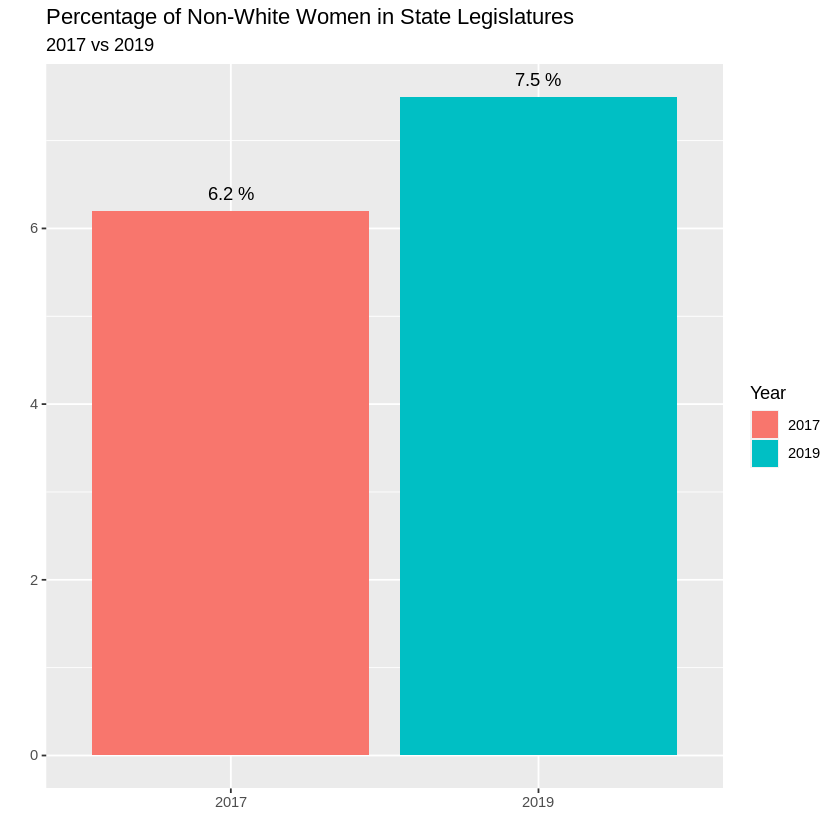

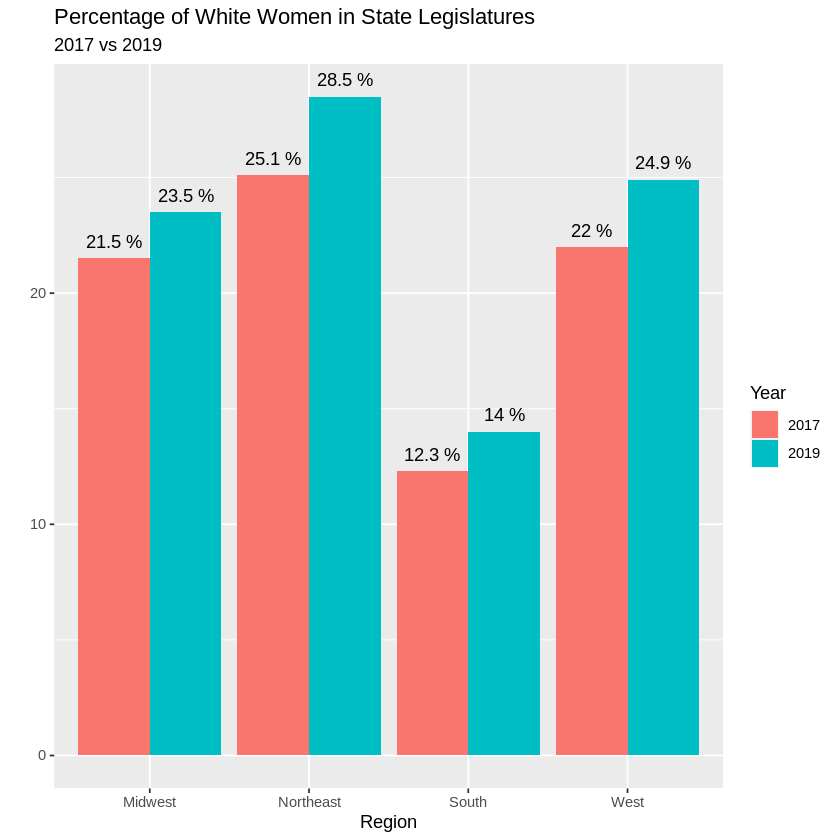

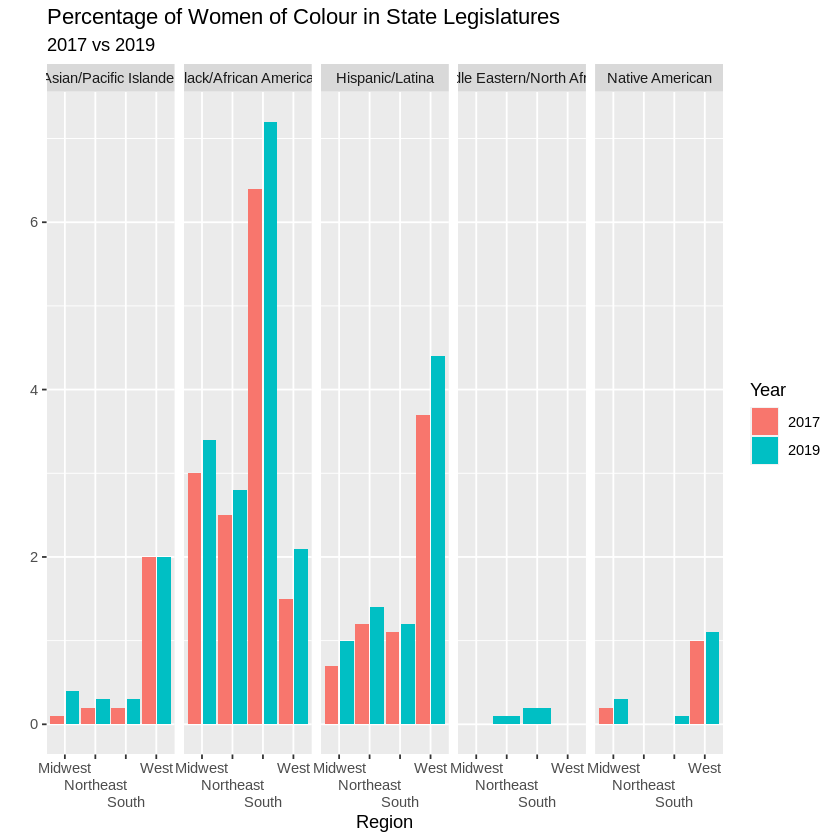

In [60]:
##regional analysis
state_leg_2017 <- state_leg_df %>%
        filter(year == 2017) %>% 
        select(state, region,Tot_seats_in_state_leg ) %>%
        distinct()


state_leg_2017 <- aggregate(list(tot_seats_reg =state_leg_2017$Tot_seats_in_state_leg), by = list(region = state_leg_2017$region), FUN = sum)

region_leg_2017 <- inner_join (
    state_leg_df, state_leg_2017,
    by = c("region"),
    copy = FALSE
)

head(region_leg_2017)


state_legr_region_2017 <- region_leg_2017%>%
    filter(year  == 2017) %>%
    select(region, race_ethnicity, tot_seats_reg, year)%>%
    group_by(region, race_ethnicity)%>%
    summarise(
        year = year,
        count = n(),
        prop_region_leg = round((count/tot_seats_reg)*100,1)
        )%>%
    arrange(region, race_ethnicity)%>%
    distinct()

write.csv(state_legr_region_2017, file = "Women prop of entire state leg in 2017 by race and region.csv")

state_leg_region_2017 <- region_leg_2017%>%
    filter(year  == 2017) %>%
    select(region, year, tot_seats_reg)%>%
    group_by(region)%>%
    summarise(
        count = n(),
        year = year,
        prop_region_leg = round((count/tot_seats_reg)*100,1)
        )%>%
    arrange(region)%>%
    distinct()

write.csv(state_leg_region_2017, file = "Women prop of entire state leg in 2017.csv")

state_leg_2019 <- state_leg_df %>%
        filter(year == 2019) %>% 
        select(state, region,Tot_seats_in_state_leg, year) %>%
        distinct()


state_leg_2019 <- aggregate(list(tot_seats_reg =state_leg_2019$Tot_seats_in_state_leg), by = list(region = state_leg_2019$region), FUN = sum)

region_leg_2019 <- inner_join (
    state_leg_df, state_leg_2019,
    by = c("region"),
    copy = FALSE
)

state_legr_region_2019 <- region_leg_2019%>%
    filter(year  == 2019) %>%
    select(region, race_ethnicity, tot_seats_reg, year)%>%
    group_by(region, race_ethnicity)%>%
    summarise(
        year = year,
        count = n(),
        prop_region_leg = round((count/tot_seats_reg)*100,1)
        )%>%
    arrange(region, race_ethnicity)%>%
    distinct()

write.csv(state_legr_region_2019, file = "Women prop of entire state leg in 2019 by race and region.csv")

state_leg_region_2019 <- region_leg_2019%>%
    filter(year  == 2019) %>%
    select(region, tot_seats_reg, year)%>%
    group_by(region)%>%
    summarise(
        count = n(),
        year = year,
        prop_region_leg = round((count/tot_seats_reg)*100,1)
        )%>%
    arrange(region)%>%
    distinct()

write.csv(state_leg_region_2019, file = "Women prop of entire state leg in 2019 by region.csv")

state_leg_region_diff <- rbind(state_leg_region_2019,state_leg_region_2017)


# print(kable(state_leg_region_diff))

ggplot(state_leg_region_diff, (aes(x = region, y = prop_region_leg, fill = factor(year), label = paste(prop_region_leg, "%")))) +
    geom_bar(stat = "identity",
        position = position_dodge(width = 0.9)) +
        labs(title = "Percentage of Women in State Legislatures",
            subtitle = "2017 vs 2019",
            x = "Region",
            y = " ",
            fill = "Year") +
    geom_text(position = position_dodge(width = 0.9), vjust = -0.8)
    ggsave("Percentage of Women in State Legislatures by Region.png")



race_reg_compare <- rbind(state_legr_region_2019,state_legr_region_2017)

race_reg_compare_woc_withmultiracial <- race_reg_compare %>% 
    filter( race_ethnicity != "White" & race_ethnicity != "White, White/Caucasian" &
                 race_ethnicity != "Unavailable") %>% 
                        distinct()
write.csv(race_reg_compare_woc_withmultiracial, file = "Women of Colour in 2017 and 2019.csv")

race_reg_quickmap <- race_reg_compare_woc_withmultiracial %>%
    group_by(year)%>%
       summarise(
       year = year, 
       count_non_white = sum(count),
        prop_leg = round((count_non_white/7383)*100,1)
        )%>%
    distinct()

print(kable(race_reg_quickmap))

ggplot(race_reg_quickmap, (aes(x = factor(year), y = prop_leg, fill = factor(year), label = paste(prop_leg, "%")))) + 
    geom_bar(stat = "identity",
        position = position_dodge(width = 0.9)) +
        labs(title = "Percentage of Non-White Women in State Legislatures",
            subtitle = "2017 vs 2019",
            x = " ",
            y = " ",
            fill = "Year") +
geom_text(position = position_dodge(width = 0.9), vjust = -0.8)
ggsave("Non-White Women in State Legislature.png")



race_reg_compare_woc <- race_reg_compare_woc_withmultiracial %>% 
                filter( race_ethnicity == "Asian/Pacific Islander" | race_ethnicity == "Black/African American" | 
        race_ethnicity == "Hispanic/Latina" | race_ethnicity == "Middle Eastern/North African"| race_ethnicity == "Native American") %>%
        distinct()



race_reg_compare_white <- race_reg_compare %>% 
                filter( race_ethnicity == "White") %>%
        distinct()
write.csv(race_reg_compare_white, file = "White Women in 2017 and 2019.csv")

ggplot(race_reg_compare_white, (aes(x = region, y = prop_region_leg, fill = factor(year), label = paste(prop_region_leg, "%")))) + 
    geom_bar(stat = "identity",
        position = position_dodge(width = 0.9)) +
        labs(title = "Percentage of White Women in State Legislatures",
            subtitle = "2017 vs 2019",
            x = "Region",
            y = " ",
            fill = "Year") +
geom_text(position = position_dodge(width = 0.9), vjust = -0.8)
ggsave("White Women in State Legislature in 2017 vs 2019 by Region.png", width = 12, height = 12)


ggplot(race_reg_compare_woc, (aes(x = region, y = prop_region_leg, fill = factor(year)))) + 
    geom_bar(stat = "identity",
        position = position_dodge(width = 1)) +
        facet_grid(. ~ race_ethnicity)+
        scale_x_discrete(guide = guide_axis(n.dodge=3))+
        labs(title = "Percentage of Women of Colour in State Legislatures",
            subtitle = "2017 vs 2019",
            x = "Region",
            y = " ",
            fill = "Year")
ggsave("Women of Colour in State Legislature in 2017 vs 2019 by Race and Region.png", width = 12, height = 12)


# pie(state_leg_region_df$count, labels = state_leg_region_df$region)




### Looking at Women Winning by State, Year, Race, Region from 2016-present

In [61]:

state_leg_party_2016 <- state_leg_df%>%
    filter(year > 2015)%>%
    group_by(state, year)%>%
    summarize(
    count = n(),
    prop_white = mean(race_ethnicity == "White"),
    prop_nonwhite = mean(race_ethnicity != "White" & race_ethnicity != "Unavailable"),
    prop_black = mean(race_ethnicity == "Black/African American"),
    prop_hispanic = mean(race_ethnicity == "Hispanic/Latina"),
    prop_mideastern = mean(race_ethnicity == "Middle Eastern/North African"),
    prop_asian = mean(race_ethnicity == "Asian/Pacific Islander"),
    prop_repub = mean(party == "Republican"),
    prop_dem = mean(party == "Democrat")
    )
#create data frame with women winning from each state, with proportions of race and ethnicity since 2016
head(state_leg_party_2016)

write.csv(state_leg_party_2016, "Proportion of women through the years.csv")

`summarise()` regrouping output by 'state' (override with `.groups` argument)



state,year,count,prop_white,prop_nonwhite,prop_black,prop_hispanic,prop_mideastern,prop_asian,prop_repub,prop_dem
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama - AL,2016,20,0.4000000,0.6000000,0.6000000,0.00000000,0,0,0.2500000,0.7000000
Alabama - AL,2017,21,0.3809524,0.6190476,0.6190476,0.00000000,0,0,0.2380952,0.7142857
Alabama - AL,2018,21,0.3809524,0.6190476,0.6190476,0.00000000,0,0,0.2380952,0.7142857
Alabama - AL,2019,23,0.3478261,0.6521739,0.6521739,0.00000000,0,0,0.3478261,0.6521739
Alabama - AL,2020,23,0.3478261,0.6521739,0.6521739,0.00000000,0,0,0.3478261,0.6521739
Alaska - AK,2016,17,0.8823529,0.1176471,0.0000000,0.05882353,0,0,0.8235294,0.1764706


In [62]:
state_leg_region_2016 <- state_leg_df%>%
    filter(year > 2015)%>%
    group_by(region, year)%>%
    summarize(
    count = n(),
    prop_white = mean(race_ethnicity == "White"),
    prop_nonwhite = mean(race_ethnicity != "White" & race_ethnicity != "Unavailable"),
    prop_black = mean(race_ethnicity == "Black/African American"),
    prop_hispanic = mean(race_ethnicity == "Hispanic/Latina"),
    prop_mideastern = mean(race_ethnicity == "Middle Eastern/North African"),
    prop_asian = mean(race_ethnicity == "Asian/Pacific Islander"),
    prop_repub = mean(party == "Republican"),
    prop_dem = mean(party == "Democrat"))
head(state_leg_region_2016)

`summarise()` regrouping output by 'region' (override with `.groups` argument)



region,year,count,prop_white,prop_nonwhite,prop_black,prop_hispanic,prop_mideastern,prop_asian,prop_repub,prop_dem
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Midwest,2016,437,0.8352403,0.1647597,0.12585812,0.02288330,0,0.004576659,0.4210526,0.5537757
Midwest,2017,449,0.8351893,0.1648107,0.11581292,0.02672606,0,0.004454343,0.4521158,0.5167038
Midwest,2018,452,0.8318584,0.1681416,0.11725664,0.02876106,0,0.004424779,0.4535398,0.5176991
Midwest,2019,508,0.8070866,0.1889764,0.11811024,0.03346457,0,0.013779528,0.3877953,0.5846457
Midwest,2020,510,0.8058824,0.1901961,0.11960784,0.03333333,0,0.013725490,0.3803922,0.5921569
Northeast,2016,526,0.8612167,0.1387833,0.08555133,0.03612167,0,0.007604563,0.3174905,0.6653992


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



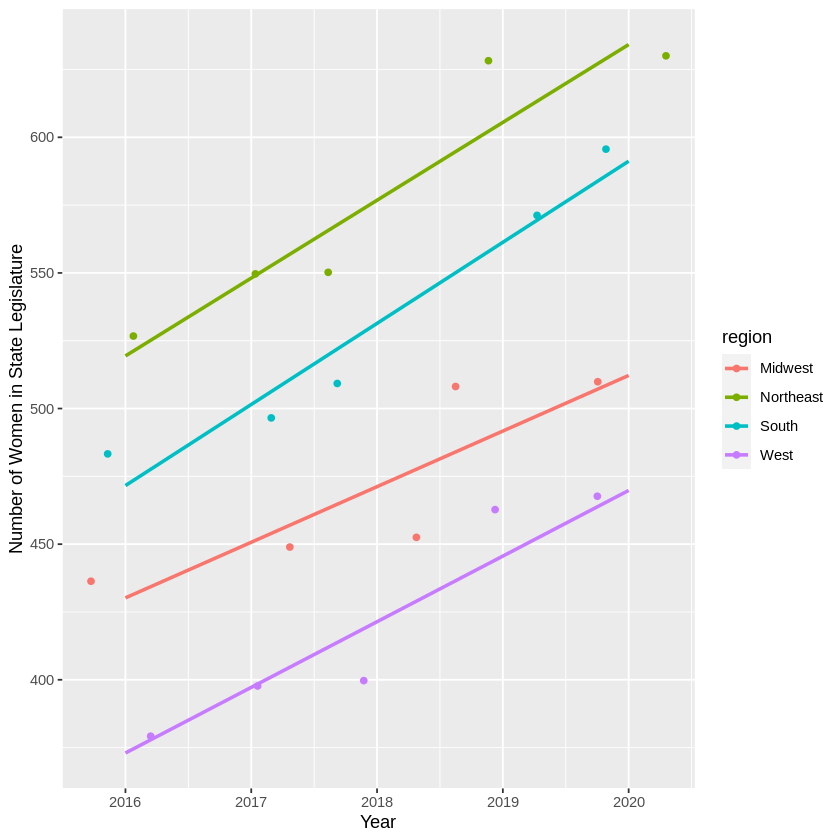

In [63]:
ggplot(state_leg_region_2016, aes(x = year, y = count, colour = region)) +
        geom_jitter(alpha = 1)+
        geom_smooth(method = "lm", se = FALSE)+
        xlab("Year")+
        ylab("Number of Women in State Legislature")
ggsave("Number of Women in State Legislature by Region 2016-present.png", width = 5, height = 5)



`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



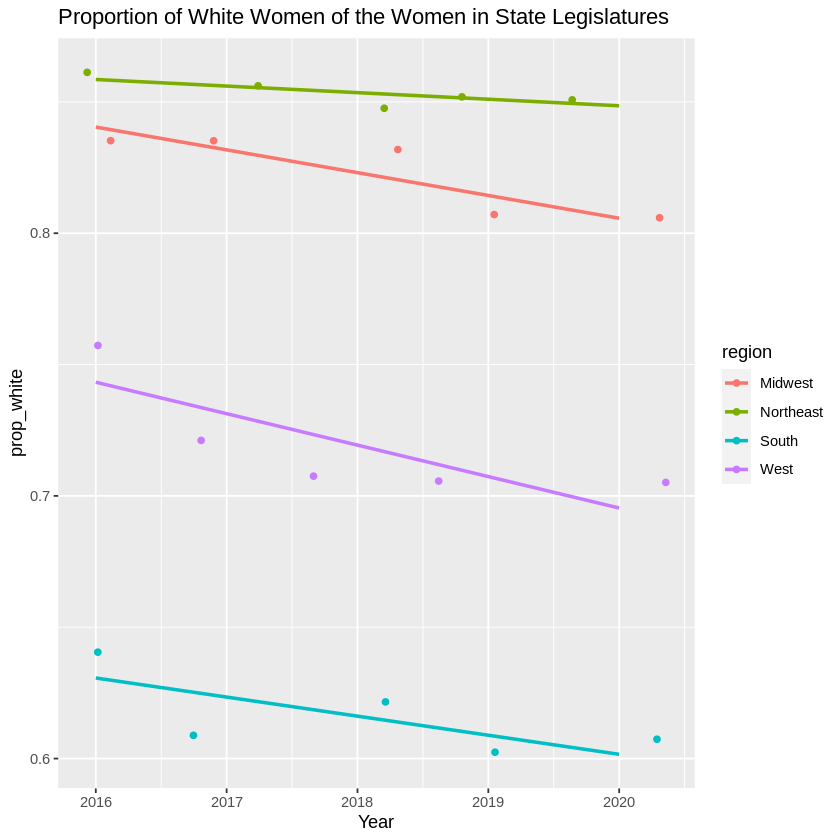

In [64]:
ggplot(state_leg_region_2016, aes(x = year, y = prop_white, colour = region)) +
        geom_jitter(alpha = 1)+
        geom_smooth(method = "lm", se = FALSE)+
        xlab("Year") +
        ggtitle("Proportion of White Women of the Women in State Legislatures")
ggsave("Proportion White Women in State Legislature by Region 2016-present.png", width = 5, height = 5)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



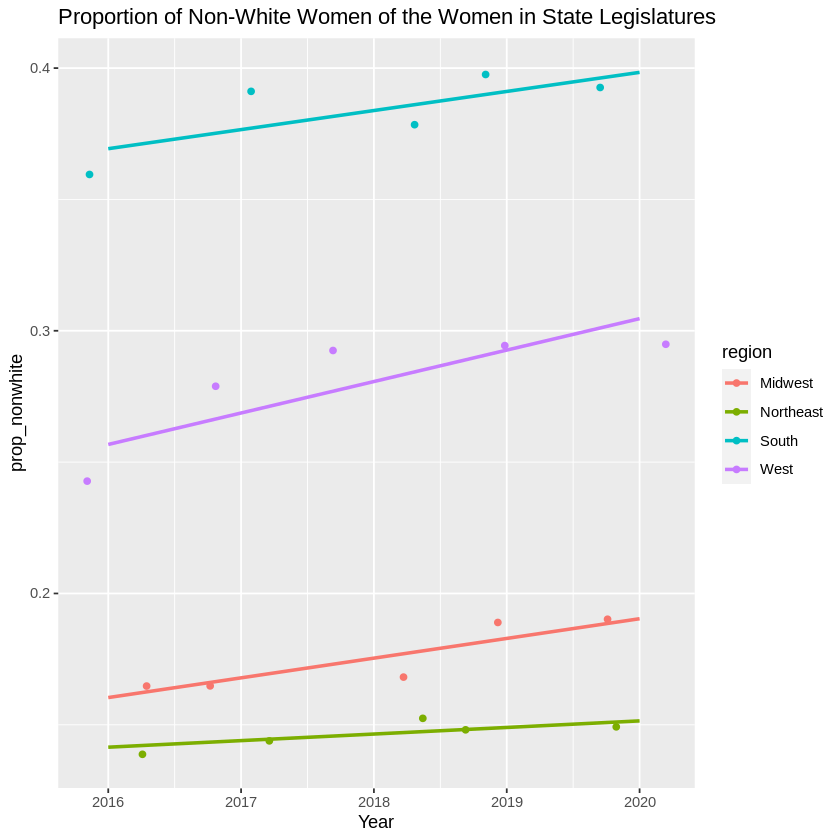

In [65]:
ggplot(state_leg_region_2016, aes(x = year, y = prop_nonwhite, colour = region)) +
        geom_jitter(alpha = 1)+
        geom_smooth(method = "lm", se = FALSE)+
        xlab("Year") +
        ggtitle("Proportion of Non-White Women of the Women in State Legislatures")
ggsave("Proportion Non-White Women in State Legislature by Region 2016-present.png", width = 5, height = 5)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



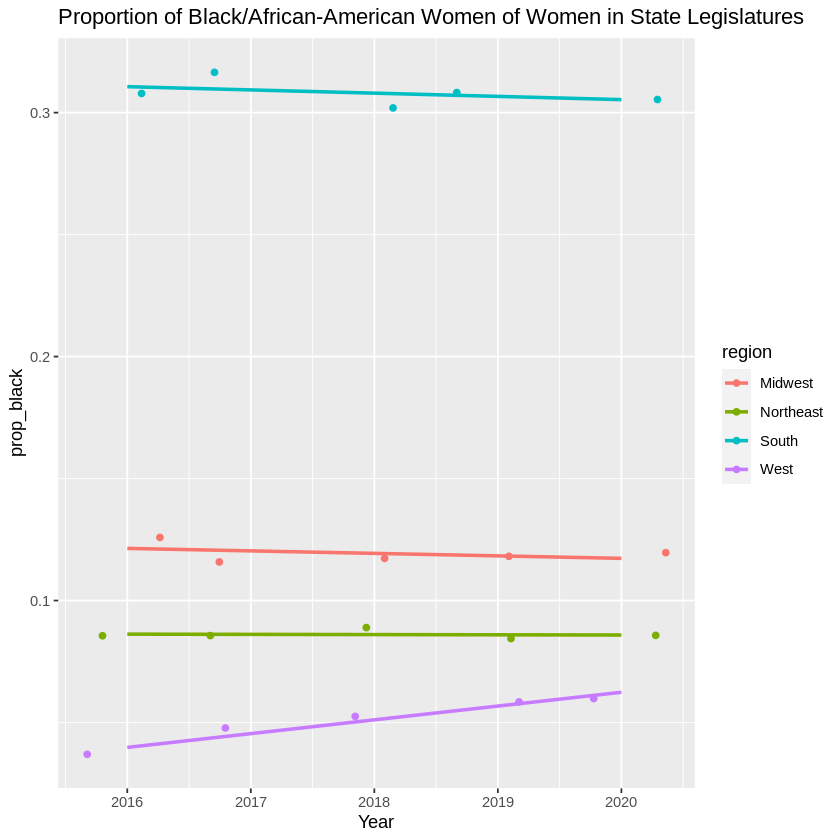

In [66]:
ggplot(state_leg_region_2016, aes(x = year, y = prop_black, colour = region)) +
        geom_jitter(alpha = 1)+
        geom_smooth(method = "lm", se = FALSE)+
        xlab("Year") +
        ggtitle("Proportion of Black/African-American Women of Women in State Legislatures")
ggsave("Proportion Black Women in State Legislature by Region 2016-present.png", width = 5, height = 5)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



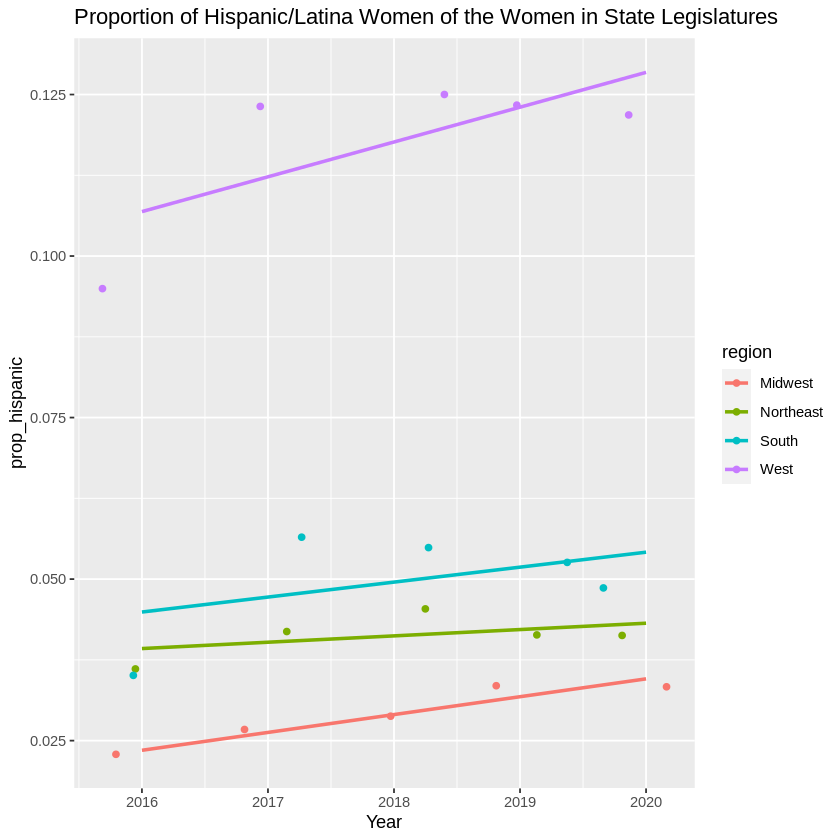

In [67]:
ggplot(state_leg_region_2016, aes(x = year, y = prop_hispanic, colour = region)) +
        geom_jitter(alpha = 1)+
        geom_smooth(method = "lm", se = FALSE)+
        xlab("Year") +
        ggtitle("Proportion of Hispanic/Latina Women of the Women in State Legislatures")
ggsave("Proportion Hispanic Women in State Legislature by Region 2016-present.png", width = 5, height = 5)

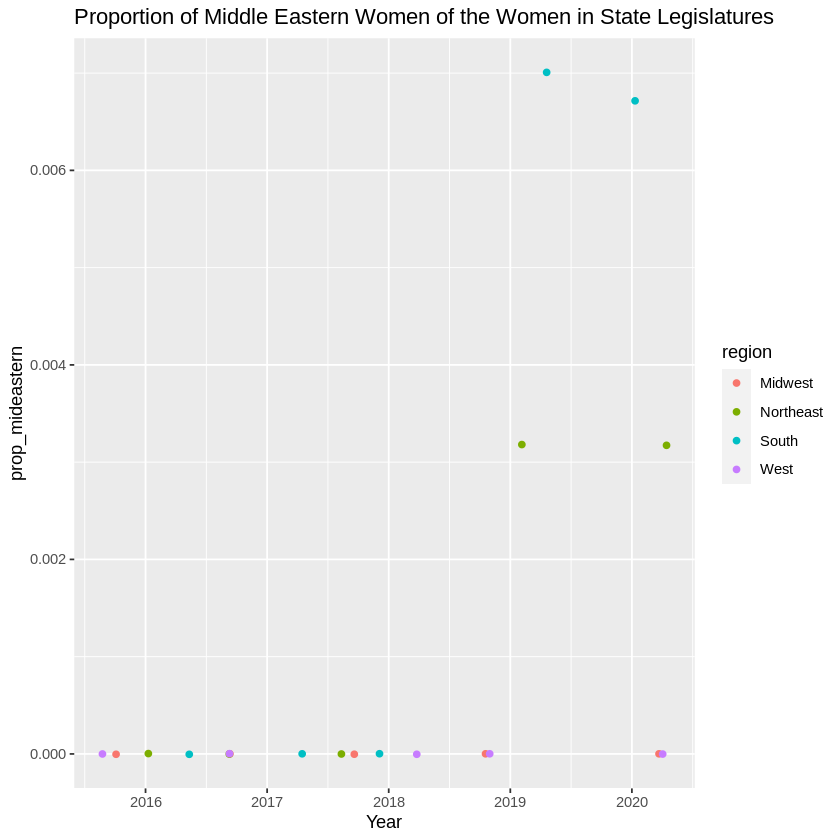

In [68]:
ggplot(state_leg_region_2016, aes(x = year, y = prop_mideastern, colour = region)) +
        geom_jitter(alpha = 1)+
        xlab("Year") +
        ggtitle("Proportion of Middle Eastern Women of the Women in State Legislatures")
ggsave("Proportion Middle Eastern in State Legislature by Region 2016-present.png", width = 5, height = 5)

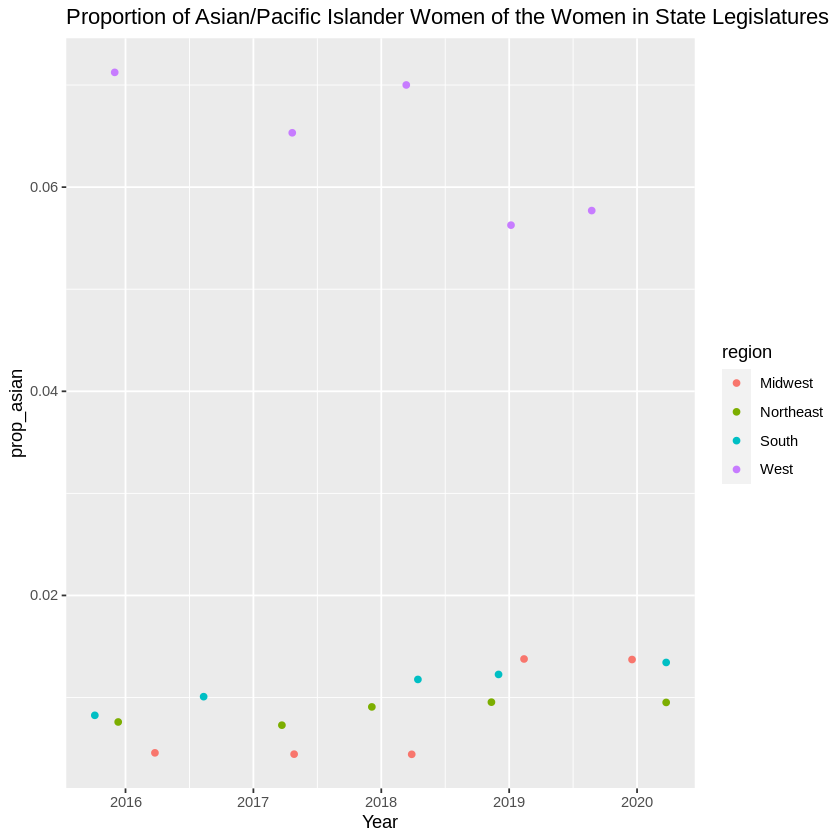

In [69]:
ggplot(state_leg_region_2016, aes(x = year, y = prop_asian, colour = region)) +
        geom_jitter(alpha = 1)+
        xlab("Year") +
        ggtitle("Proportion of Asian/Pacific Islander Women of the Women in State Legislatures")
ggsave("Proportion of Asian Women in State Legislature by Region 2016-present.png", width = 5, height = 5)

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



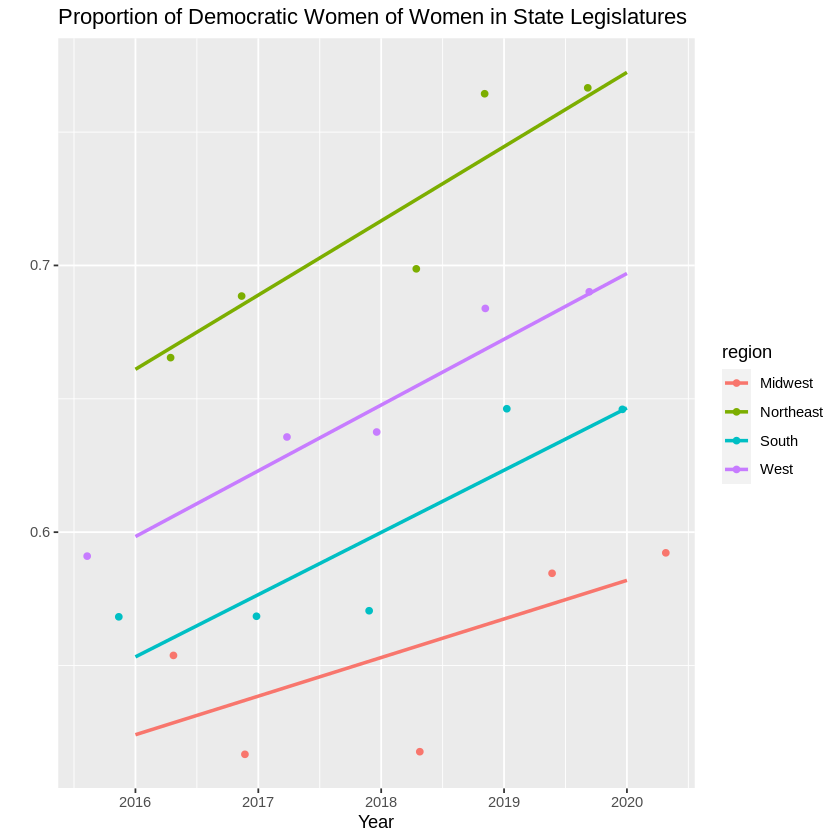

In [70]:
ggplot(state_leg_region_2016, aes(x = year, y = prop_dem, colour = region)) +
        geom_jitter(alpha = 1)+
        geom_smooth(method = "lm", se = FALSE)+
        labs(title = "Proportion of Democratic Women of Women in State Legislatures",
             x = "Year",
             y = " ") +
        ggsave("Proportion of Democratic Women of the Women in State Legislatures.png")
ggsave("Proportion Democratic Women in State Legislature by Region 2016-present.png", width = 5, height = 5)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



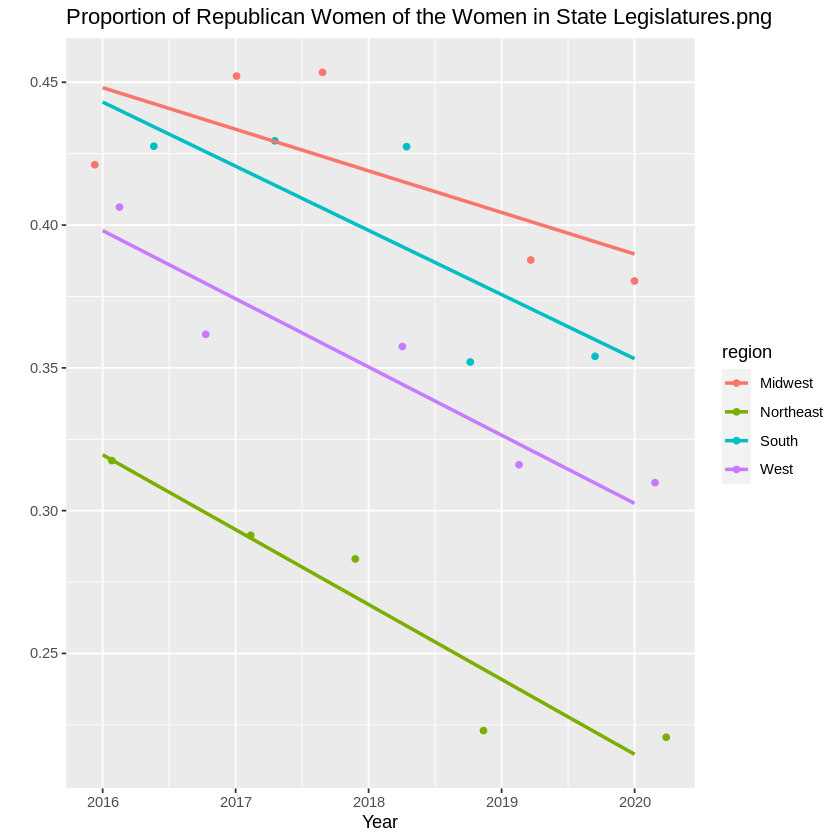

In [71]:
ggplot(state_leg_region_2016, aes(x = year, y = prop_repub, colour = region)) +
        geom_jitter(alpha = 1)+
        geom_smooth(method = "lm", se = FALSE)+
        xlab("Year") +
        ylab(" ")+
        ggtitle("Proportion of Republican Women of the Women in State Legislatures.png")
ggsave("Proportion Republican Women in State Legislature by Region 2016-present.png", width = 5, height = 5)

In [72]:
print(kable(state_leg_region_2016))



|region    | year| count| prop_white| prop_nonwhite| prop_black| prop_hispanic| prop_mideastern| prop_asian| prop_repub|  prop_dem|
|:---------|----:|-----:|----------:|-------------:|----------:|-------------:|---------------:|----------:|----------:|---------:|
|Midwest   | 2016|   437|  0.8352403|     0.1647597|  0.1258581|     0.0228833|       0.0000000|  0.0045767|  0.4210526| 0.5537757|
|Midwest   | 2017|   449|  0.8351893|     0.1648107|  0.1158129|     0.0267261|       0.0000000|  0.0044543|  0.4521158| 0.5167038|
|Midwest   | 2018|   452|  0.8318584|     0.1681416|  0.1172566|     0.0287611|       0.0000000|  0.0044248|  0.4535398| 0.5176991|
|Midwest   | 2019|   508|  0.8070866|     0.1889764|  0.1181102|     0.0334646|       0.0000000|  0.0137795|  0.3877953| 0.5846457|
|Midwest   | 2020|   510|  0.8058824|     0.1901961|  0.1196078|     0.0333333|       0.0000000|  0.0137255|  0.3803922| 0.5921569|
|Northeast | 2016|   526|  0.8612167|     0.1387833|  0.0855513|     0.036

In [73]:
state_leg_partyaff_2016 <- state_leg_df%>%
    filter(year > 2015)%>%
    group_by(party, year)%>%
    summarize(
    count = n(),
    prop_white = mean(race_ethnicity == "White"),
    prop_nonwhite = mean(race_ethnicity != "White"),
    prop_black = mean(race_ethnicity == "Black/African American"),
    prop_hispanic = mean(race_ethnicity == "Hispanic/Latina"),
    prop_mideastern = mean(race_ethnicity == "Middle Eastern/North African"),
    prop_asian = mean(race_ethnicity == "Asian/Pacific Islander")
        ) #create dataframe with women winning based on party affliation and race since 2016

`summarise()` regrouping output by 'party' (override with `.groups` argument)



In [74]:
print((kable(state_leg_partyaff_2016)))



|party       | year| count| prop_white| prop_nonwhite| prop_black| prop_hispanic| prop_mideastern| prop_asian|
|:-----------|----:|-----:|----------:|-------------:|----------:|-------------:|---------------:|----------:|
|Democrat    | 2016|  1091|  0.6544455|     0.3455545|  0.2364803|     0.0632447|       0.0000000|  0.0247479|
|Democrat    | 2017|  1145|  0.6270742|     0.3729258|  0.2375546|     0.0855895|       0.0000000|  0.0262009|
|Democrat    | 2018|  1165|  0.6214592|     0.3785408|  0.2351931|     0.0901288|       0.0000000|  0.0283262|
|Democrat    | 2019|  1462|  0.6354309|     0.3645691|  0.2134063|     0.0841313|       0.0041040|  0.0294118|
|Democrat    | 2020|  1493|  0.6363027|     0.3636973|  0.2150033|     0.0817147|       0.0040188|  0.0301407|
|Independent | 2016|     7|  0.8571429|     0.1428571|  0.1428571|     0.0000000|       0.0000000|  0.0000000|
|Independent | 2017|     7|  1.0000000|     0.0000000|  0.0000000|     0.0000000|       0.0000000|  0.0000000|

In [75]:
state_leg_region_2016[which.max(state_leg_region_2016$count),]

region,year,count,prop_white,prop_nonwhite,prop_black,prop_hispanic,prop_mideastern,prop_asian,prop_repub,prop_dem
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Northeast,2020,630,0.8507937,0.1492063,0.08571429,0.04126984,0.003174603,0.00952381,0.2206349,0.7666667


In [76]:
state_leg_region_2016[which.min(state_leg_region_2016$count),]

region,year,count,prop_white,prop_nonwhite,prop_black,prop_hispanic,prop_mideastern,prop_asian,prop_repub,prop_dem
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
West,2016,379,0.7572559,0.2427441,0.03693931,0.09498681,0,0.07124011,0.4063325,0.591029


In [77]:
state_leg_region_in2017 <- state_leg_region_2016 %>%
                            filter(
                            year == 2017)

state_leg_region_in2017[which.max(state_leg_region_in2017$count),] #figure out where more women were serving after 2016 election



region,year,count,prop_white,prop_nonwhite,prop_black,prop_hispanic,prop_mideastern,prop_asian,prop_repub,prop_dem
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Northeast,2017,549,0.856102,0.143898,0.0856102,0.04189435,0,0.007285974,0.291439,0.6885246


In [78]:
state_leg_region_in2017[which.max(state_leg_region_in2017$prop_nonwhite),]
state_leg_region_in2017[which.min(state_leg_region_in2017$prop_nonwhite),]

region,year,count,prop_white,prop_nonwhite,prop_black,prop_hispanic,prop_mideastern,prop_asian,prop_repub,prop_dem
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
South,2017,496,0.608871,0.391129,0.3165323,0.05645161,0,0.01008065,0.4294355,0.5685484


region,year,count,prop_white,prop_nonwhite,prop_black,prop_hispanic,prop_mideastern,prop_asian,prop_repub,prop_dem
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Northeast,2017,549,0.856102,0.143898,0.0856102,0.04189435,0,0.007285974,0.291439,0.6885246


In [79]:
state_leg_region_in2019 <- state_leg_region_2016 %>%
                            filter(
                            year == 2019)

state_leg_region_in2019[which.max(state_leg_region_in2019$count),] #figure out where more women were serving after 2018 midterms

region,year,count,prop_white,prop_nonwhite,prop_black,prop_hispanic,prop_mideastern,prop_asian,prop_repub,prop_dem
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Northeast,2019,628,0.8519108,0.1480892,0.0843949,0.04140127,0.003184713,0.00955414,0.2229299,0.7643312


In [80]:
state_leg_region_in2019[which.max(state_leg_region_in2019$prop_nonwhite),]
state_leg_region_in2019[which.min(state_leg_region_in2019$prop_nonwhite),]

region,year,count,prop_white,prop_nonwhite,prop_black,prop_hispanic,prop_mideastern,prop_asian,prop_repub,prop_dem
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
South,2019,571,0.6024518,0.3975482,0.3082312,0.0525394,0.007005254,0.01225919,0.352014,0.6462347


region,year,count,prop_white,prop_nonwhite,prop_black,prop_hispanic,prop_mideastern,prop_asian,prop_repub,prop_dem
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Northeast,2019,628,0.8519108,0.1480892,0.0843949,0.04140127,0.003184713,0.00955414,0.2229299,0.7643312


### Investigating 2008-present Trends

In [81]:
state_leg_partyaff <- state_leg_df%>%
    group_by(party, year)%>%
    summarize(
    count = n(),
    prop_white = mean(race_ethnicity == "White"),
    prop_nonwhite = mean(race_ethnicity != "White"),
    prop_black = mean(race_ethnicity == "Black/African American"),
    prop_hispanic = mean(race_ethnicity == "Hispanic/Latina"),
    prop_mideastern = mean(race_ethnicity == "Middle Eastern/North African"),
    prop_asian = mean(race_ethnicity == "Asian/Pacific Islander")
        ) #create dataframe with women winning based on party affliation and race since 2008



`summarise()` regrouping output by 'party' (override with `.groups` argument)



In [82]:
print(kable(state_leg_partyaff))



|party       | year| count| prop_white| prop_nonwhite| prop_black| prop_hispanic| prop_mideastern| prop_asian|
|:-----------|----:|-----:|----------:|-------------:|----------:|-------------:|---------------:|----------:|
|Democrat    | 2008|  1212|  0.7219472|     0.2780528|  0.1955446|     0.0495050|       0.0000000|  0.0189769|
|Democrat    | 2009|  1284|  0.7359813|     0.2640187|  0.1822430|     0.0490654|       0.0007788|  0.0202492|
|Democrat    | 2010|  1282|  0.7332293|     0.2667707|  0.1809672|     0.0507020|       0.0007800|  0.0218409|
|Democrat    | 2011|  1080|  0.6861111|     0.3138889|  0.2194444|     0.0555556|       0.0009259|  0.0277778|
|Democrat    | 2012|  1063|  0.6801505|     0.3198495|  0.2229539|     0.0573848|       0.0009407|  0.0272813|
|Democrat    | 2013|  1163|  0.6870163|     0.3129837|  0.2098022|     0.0619089|       0.0008598|  0.0232158|
|Democrat    | 2014|  1159|  0.6859362|     0.3140638|  0.2079379|     0.0647110|       0.0008628|  0.0232959|

In [83]:
state_leg_region <- state_leg_df%>%
    group_by(region, year)%>%
    summarize(
    count = n(),
    prop_white = mean(race_ethnicity == "White"),
    prop_nonwhite = mean(race_ethnicity != "White"),
    prop_black = mean(race_ethnicity == "Black/African American"),
    prop_hispanic = mean(race_ethnicity == "Hispanic/Latina"),
    prop_mideastern = mean(race_ethnicity == "Middle Eastern/North African"),
    prop_asian = mean(race_ethnicity == "Asian/Pacific Islander"),
    prop_repub = mean(party == "Republican"),
    prop_dem = mean(party == "Democrat"))
print(kable(state_leg_region)) #create dataframe with women winning by region and race since 2008

`summarise()` regrouping output by 'region' (override with `.groups` argument)





|region    | year| count| prop_white| prop_nonwhite| prop_black| prop_hispanic| prop_mideastern| prop_asian| prop_repub|  prop_dem|
|:---------|----:|-----:|----------:|-------------:|----------:|-------------:|---------------:|----------:|----------:|---------:|
|Midwest   | 2008|   408|  0.8357843|     0.1642157|  0.1274510|     0.0220588|       0.0000000|  0.0049020|  0.3602941| 0.6176471|
|Midwest   | 2009|   432|  0.8449074|     0.1550926|  0.1203704|     0.0208333|       0.0023148|  0.0069444|  0.3263889| 0.6504630|
|Midwest   | 2010|   439|  0.8382688|     0.1617312|  0.1252847|     0.0205011|       0.0022779|  0.0068337|  0.3280182| 0.6492027|
|Midwest   | 2011|   437|  0.8329519|     0.1670481|  0.1327231|     0.0228833|       0.0022883|  0.0045767|  0.4416476| 0.5308924|
|Midwest   | 2012|   431|  0.8375870|     0.1624130|  0.1299304|     0.0208817|       0.0023202|  0.0023202|  0.4477958| 0.5243619|
|Midwest   | 2013|   427|  0.8477752|     0.1522248|  0.1124122|     0.025

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



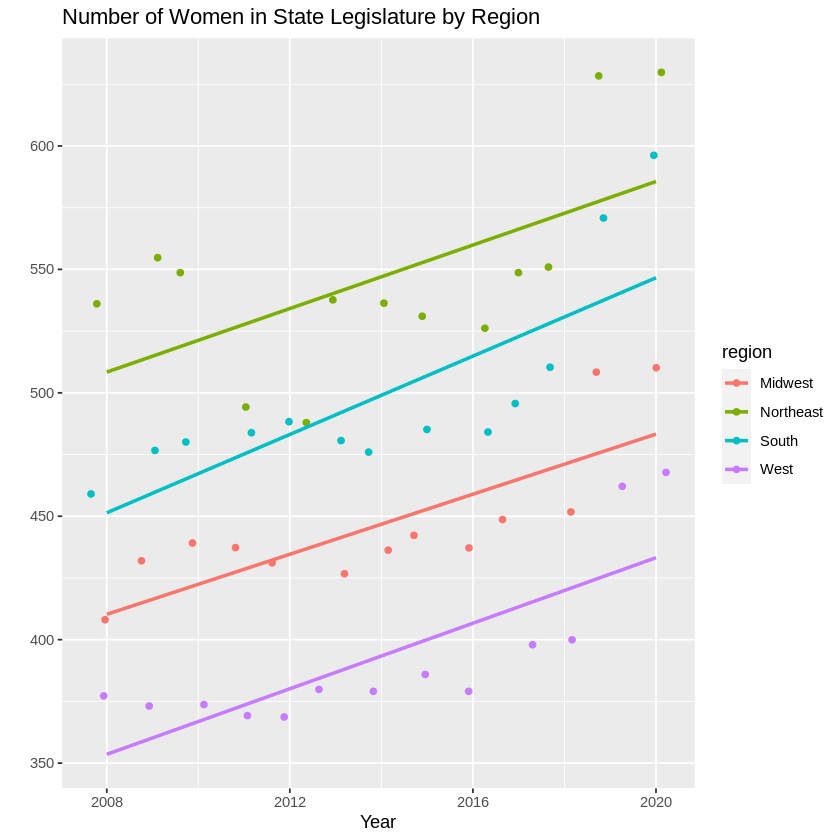

In [84]:
ggplot(state_leg_region, aes(x = year, y = count, colour = region)) +
        geom_jitter(alpha = 1)+
        geom_smooth(method = "lm", se = FALSE)+
        labs(title = "Number of Women in State Legislature by Region",
            x = "Year",
            y = " ")
ggsave("Scatterplot of Number of Women in State Legislature by Region.png", width = 5, height = 5)


Saving 6.67 x 6.67 in image



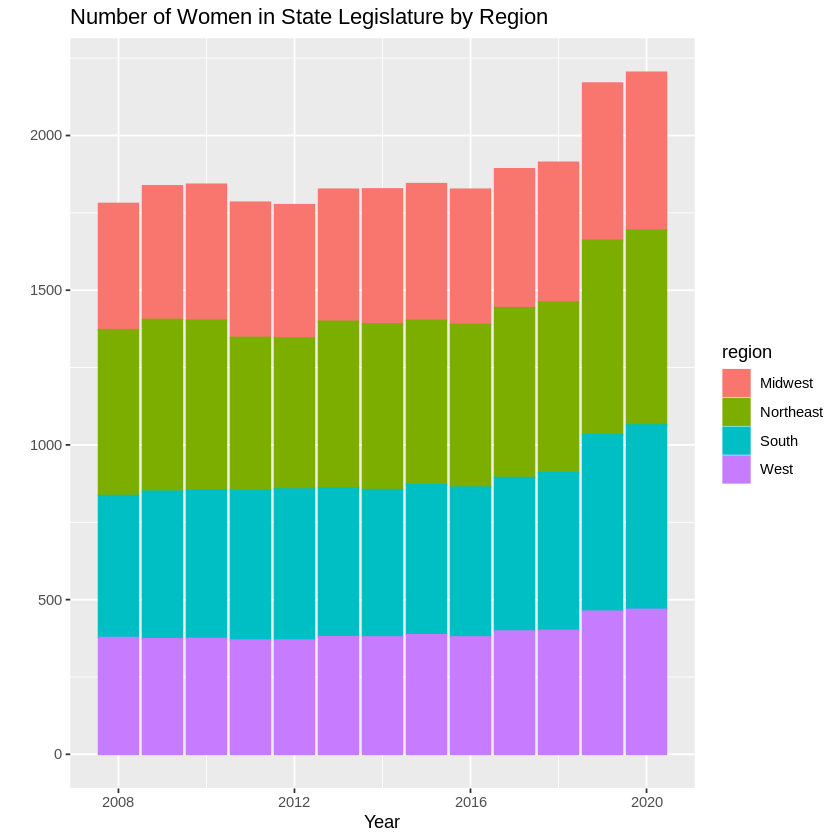

In [85]:
ggplot(state_leg_region, aes(x = year, y = count, colour = region, fill = region)) +
        geom_bar(stat = "identity") + 
        labs(title = "Number of Women in State Legislature by Region",
             x = "Year",
             y = " ")
ggsave("Number of Women in State Legislature.png")
ggsave("Bar Graph of Number of Women in State Legislature by Region.png", width = 5, height = 5)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



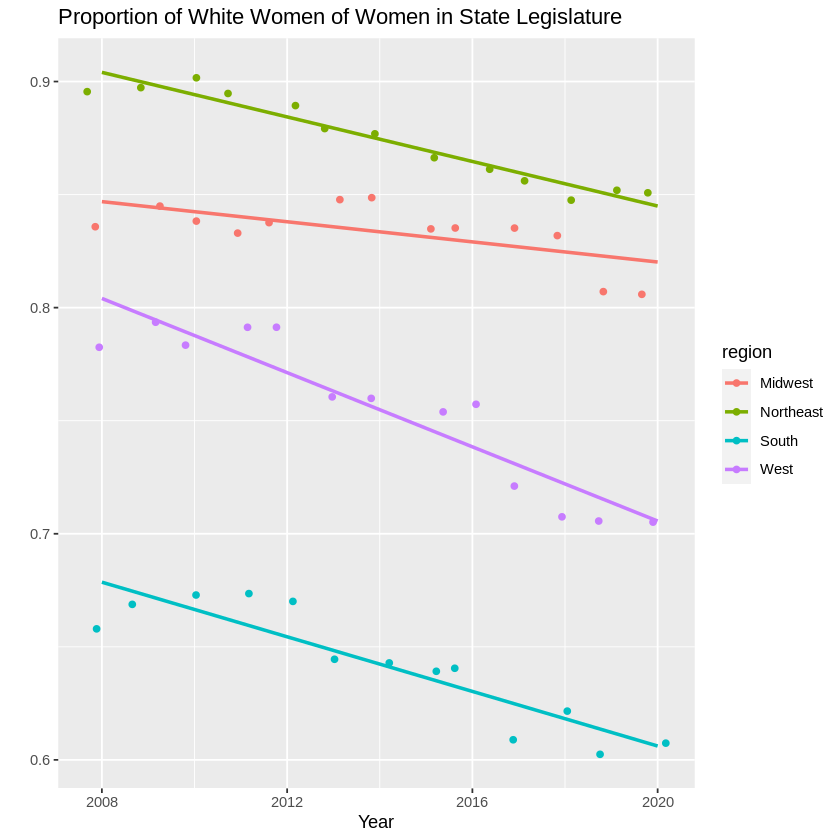

In [86]:
ggplot(state_leg_region, aes(x = year, y = prop_white, colour = region)) +
        geom_jitter(alpha = 1)+
        geom_smooth(method = "lm", se = FALSE)+
        xlab("Year") +
        ylab(" ")+
        ggtitle("Proportion of White Women of Women in State Legislature")
ggsave("Proportion of White Women of Women in State Legislature by Region.png", width = 5, height = 5)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



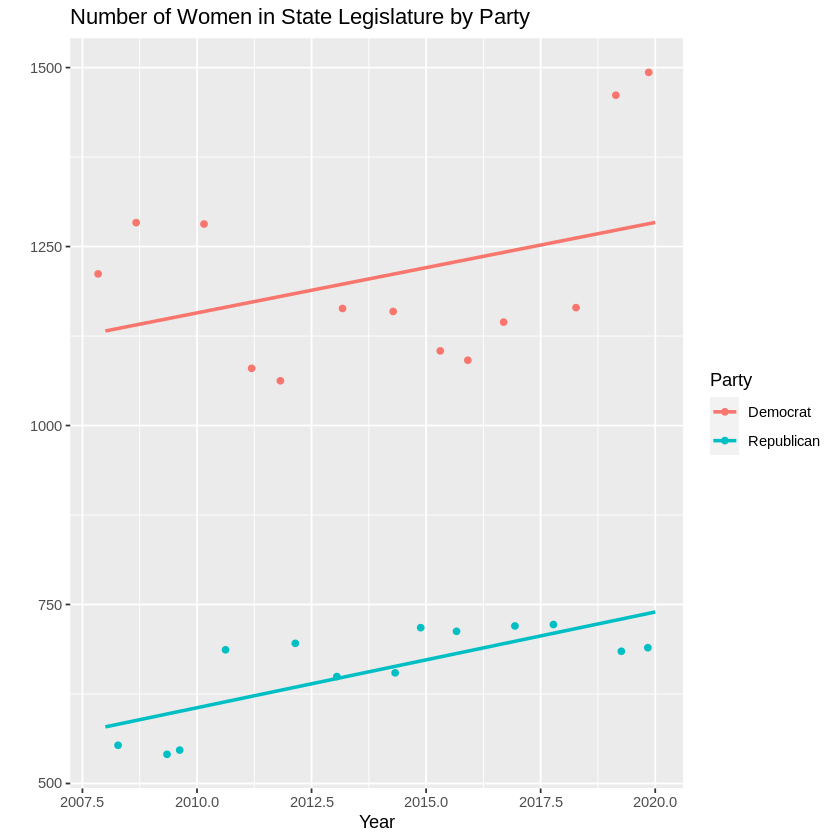

In [87]:
state_leg_partyaff_dorr <- state_leg_partyaff %>% 
                        filter(
                        party == "Democrat" | party == "Republican")
                            

ggplot(state_leg_partyaff_dorr, aes(x = year, y = count, colour = party)) +
        geom_jitter(alpha = 1)+
        labs(title = "Number of Women in State Legislature by Party", 
            x = "Year", 
            y = " ",
            colour = "Party")+
        geom_smooth(method = "lm", se = FALSE)
ggsave("Number of Women in State Legislature by Party.png", width = 5, height = 5)

`geom_smooth()` using formula 'y ~ x'

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



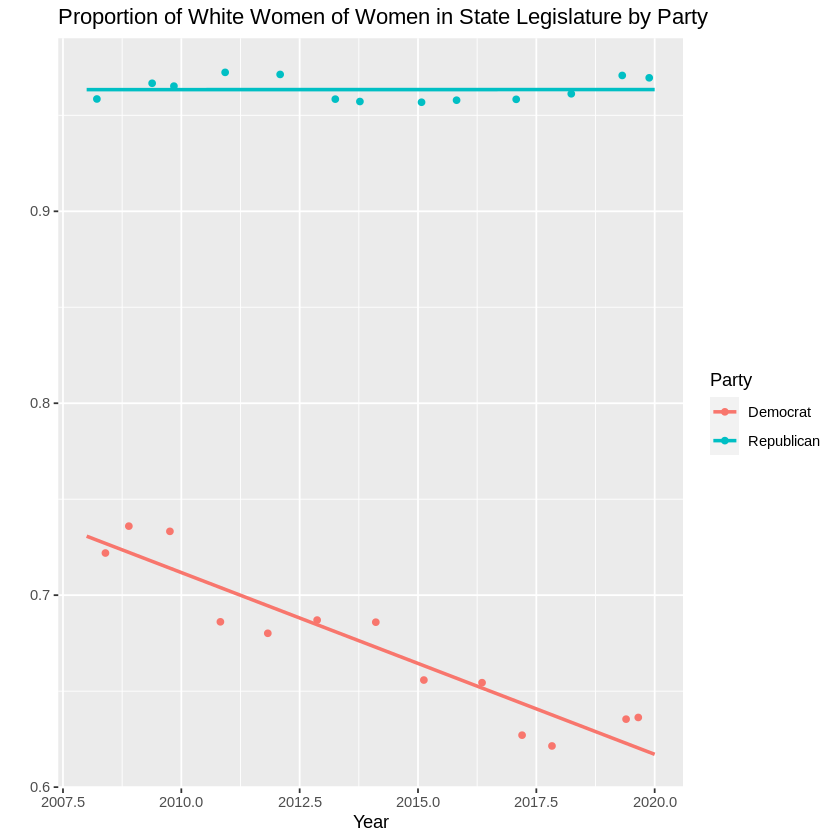

In [88]:
ggplot(state_leg_partyaff_dorr, aes(x = year, y = prop_white, colour = party)) +
        geom_jitter(alpha = 1)+
         labs(title = "Proportion of White Women of Women in State Legislature by Party", 
            x = "Year", 
            y = " ",
            colour = "Party")+
        geom_smooth(method = "lm", se = FALSE)
        ggsave("Proportion of White Women of Women in State Legislature.png")
ggsave("Proportion of White Women of the Women in State Legislature by Party.png", width = 5, height = 5)

`geom_smooth()` using formula 'y ~ x'

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



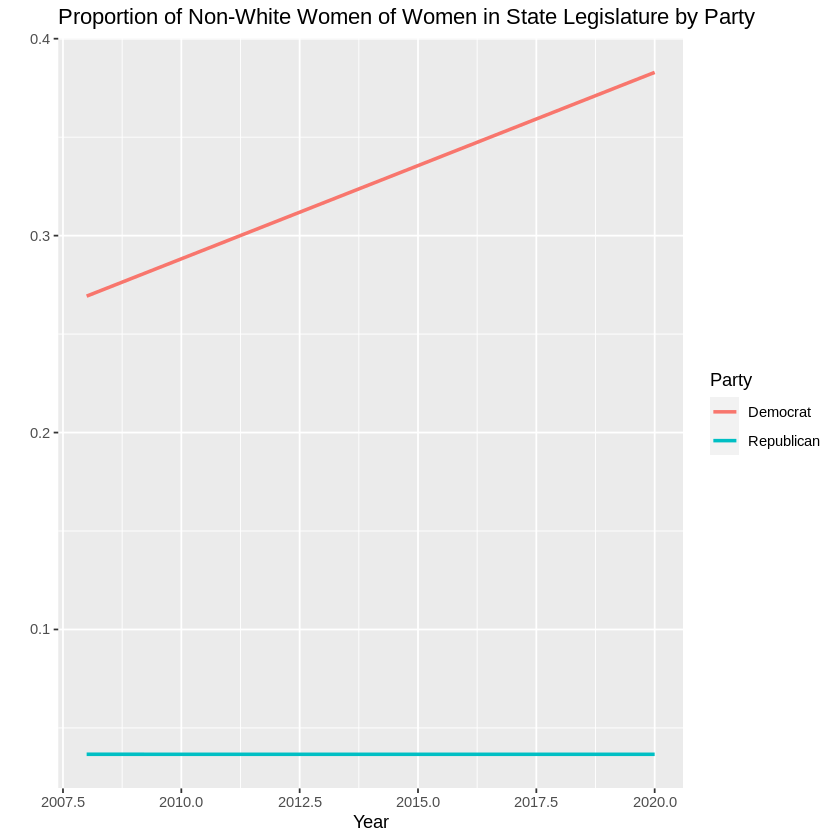

In [89]:
ggplot(state_leg_partyaff_dorr, aes(x = year, y = prop_nonwhite, colour = party)) +
        labs(title = "Proportion of Non-White Women of Women in State Legislature by Party", 
            x = "Year", 
            y = " ",
            colour = "Party")+
        geom_smooth(method = "lm", se = FALSE)
        ggsave("Proportion of Non-White Women of Women in State Legislature.png")
ggsave("Proportion of Non-White Women of the Women in State Legislature by Party.png", width = 5, height = 5)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



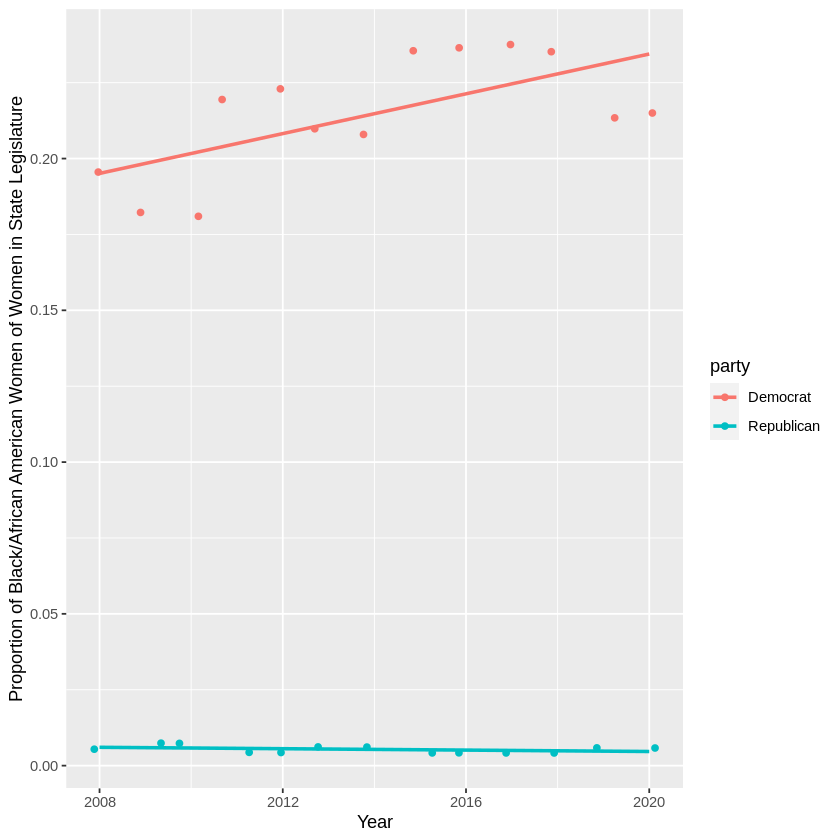

In [90]:
ggplot(state_leg_partyaff_dorr, aes(x = year, y = prop_black, colour = party)) +
        geom_jitter(alpha = 1)+
        geom_smooth(method = "lm", se = FALSE)+
        xlab("Year") +
        ylab("Proportion of Black/African American Women of Women in State Legislature")
ggsave("Proportion of Black Women of the Women in State Legislature by Party.png", width = 5, height = 5)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



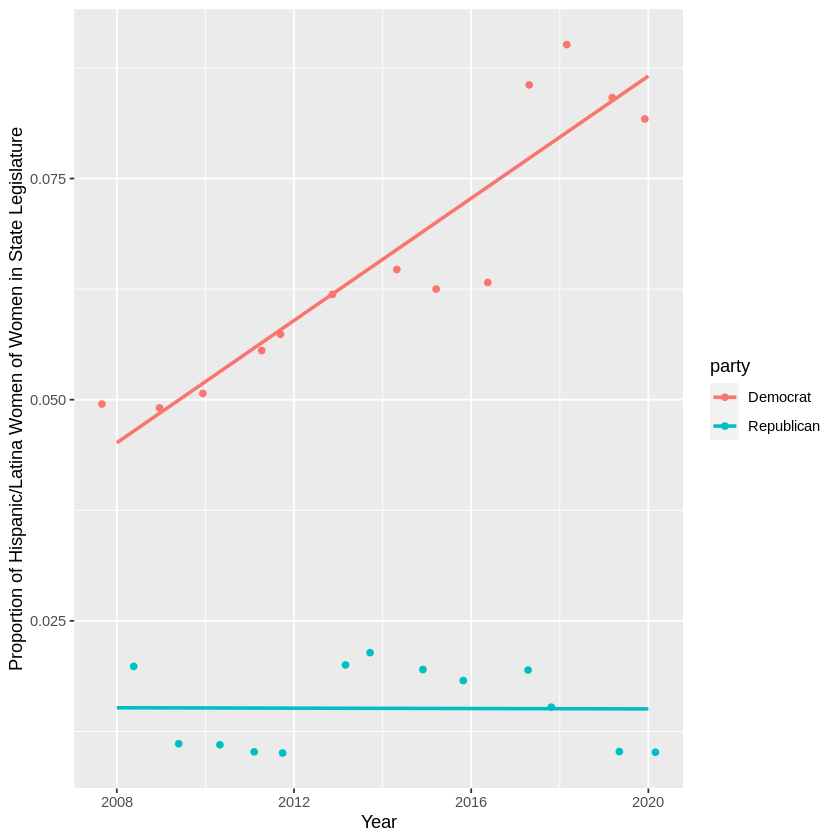

In [91]:
ggplot(state_leg_partyaff_dorr, aes(x = year, y = prop_hispanic, colour = party)) +
        geom_jitter(alpha = 1)+
        geom_smooth(method = "lm", se = FALSE)+
        xlab("Year") +
        ylab("Proportion of Hispanic/Latina Women of Women in State Legislature")
ggsave("Proportion of Hispanic Women of the Women in State Legislature by Party.png", width = 5, height = 5)

In [92]:
state_leg_partyaff_DorR_2017 <- state_leg_party_2016 %>%
                            filter(
                            year == 2017 
                            )

state_leg_partyaff_DorR_2017[which.max(state_leg_partyaff_DorR_2017$count),] #which had the most women serving in 2017?
state_leg_partyaff_DorR_2017[which.min(state_leg_partyaff_DorR_2017$count),] #which state had least amount of women serving in 2017?

state,year,count,prop_white,prop_nonwhite,prop_black,prop_hispanic,prop_mideastern,prop_asian,prop_repub,prop_dem
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
New Hampshire - NH,2017,127,0.9685039,0.03149606,0.01574803,0.007874016,0,0.007874016,0.3307087,0.6692913


state,year,count,prop_white,prop_nonwhite,prop_black,prop_hispanic,prop_mideastern,prop_asian,prop_repub,prop_dem
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Wyoming - WY,2017,10,0.9,0.1,0,0,0,0,0.6,0.4


In [93]:
state_leg_partyaff_DorR_2017[which.max(state_leg_partyaff_DorR_2017$prop_nonwhite),]
state_leg_partyaff_DorR_2017[which.min(state_leg_partyaff_DorR_2017$prop_nonwhite),]

state,year,count,prop_white,prop_nonwhite,prop_black,prop_hispanic,prop_mideastern,prop_asian,prop_repub,prop_dem
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hawaii - HI,2017,21,0.2380952,0.7619048,0,0,0,0.7142857,0.1428571,0.8571429


state,year,count,prop_white,prop_nonwhite,prop_black,prop_hispanic,prop_mideastern,prop_asian,prop_repub,prop_dem
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Nebraska - NE,2017,14,1,0,0,0,0,0,0,0


In [94]:
state_leg_partyaff_DorR_2019 <- state_leg_party_2016 %>%
                            filter(
                            year == 2019 
                            )

state_leg_partyaff_DorR_2019[which.max(state_leg_partyaff_DorR_2019$count),] #which state had the most women serving in 2019?
state_leg_partyaff_DorR_2019[which.min(state_leg_partyaff_DorR_2019$count),]#which state had the least amount women serving in 2019?

state,year,count,prop_white,prop_nonwhite,prop_black,prop_hispanic,prop_mideastern,prop_asian,prop_repub,prop_dem
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
New Hampshire - NH,2019,145,0.9586207,0.04137931,0.02068966,0,0.006896552,0.0137931,0.2,0.8


state,year,count,prop_white,prop_nonwhite,prop_black,prop_hispanic,prop_mideastern,prop_asian,prop_repub,prop_dem
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Nebraska - NE,2019,14,1,0,0,0,0,0,0,0


In [95]:
state_leg_partyaff_DorR_2019[which.max(state_leg_partyaff_DorR_2019$prop_nonwhite),]
state_leg_partyaff_DorR_2019[which.min(state_leg_partyaff_DorR_2019$prop_nonwhite),]

state,year,count,prop_white,prop_nonwhite,prop_black,prop_hispanic,prop_mideastern,prop_asian,prop_repub,prop_dem
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hawaii - HI,2019,24,0.25,0.75,0,0,0,0.625,0.125,0.875


state,year,count,prop_white,prop_nonwhite,prop_black,prop_hispanic,prop_mideastern,prop_asian,prop_repub,prop_dem
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Nebraska - NE,2019,14,1,0,0,0,0,0,0,0
